In this Kernel we will try to predict the price of house using machine learning.First we will study the affect of scaling the parameters on the accuracy of the model.This kernel is work in process.I will be updating the kernel in coming days.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/melbournehousingprices/melb_data.csv


**Import Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/melbournehousingprices/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**Summary of Dataset**

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 13580
Columns  : 21

Features :
     : ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']

Missing values    : 13256

Unique values :  
 Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64


In [5]:
#df.isnull().sum()

**Addressing Missing Value**

In [6]:
df['BuildingArea'].fillna((df['BuildingArea'].mean()), inplace=True)

Missing value in the Building area is updated by the mean area 

**Dropping the Columns**

In [7]:
df1=df.drop(["YearBuilt","CouncilArea"],axis=1)

We have dropped the Year built and Council Area column as many rows of data is missing.

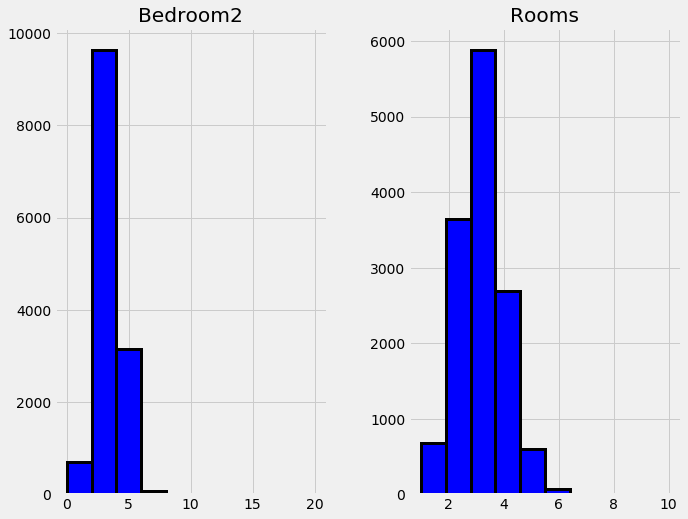

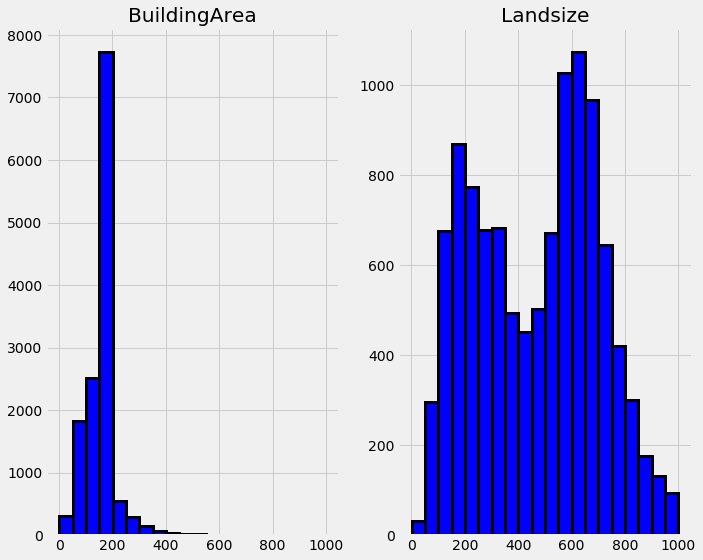

In [8]:
df1[['Rooms','Bedroom2']].hist(figsize=(10,8),bins=10,color='b',linewidth='3',edgecolor='k')
df1[['BuildingArea','Landsize']].hist(figsize=(10,8),bins=20,color='b',linewidth='3',edgecolor='k',range=(1,1000))
#df1[['Landsize']].hist(figsize=(10,8),bins=10,color='b',linewidth='3',edgecolor='k',range=(1,100))
plt.tight_layout()
plt.show()

**Matrix of Features**

In [9]:
X=df1[['Bedroom2','BuildingArea']].values
y=df1['Price'].values

**Building Linear Regression Model in Keras**

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [11]:
model=Sequential()
model.add(Dense(1,input_dim=2))
model.compile(Adam(lr=0.8),'mean_squared_error')

**Test Train Split**

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
model.fit(X_train,y_train)

Epoch 1/1
10864/10864 [==============================] - 1s 57us/step - loss: 1515811660487.8232


The loss value is high as the the lose is difference of Square of Price.

**Scaling the input to Improve Accuracy**

In [14]:
df1['BuildingArea1000']=df['BuildingArea']/1000
df1['Price100k']=df['Price']/1e5

In [15]:
X=df1[['Bedroom2','BuildingArea1000']].values
y=df1['Price100k'].values

In [16]:
#df1.head()

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
model=Sequential()
model.add(Dense(1,input_dim=2))
model.compile(Adam(lr=0.8),'mean_squared_error')

In [19]:
model.fit(X_train,y_train)

Epoch 1/1
10864/10864 [==============================] - 0s 40us/step - loss: 38.5440


We can see that the loss has considerably reduced by Scaling the values of Building area and Size.

**Accuracy of Model**

In [20]:
from sklearn.metrics import r2_score

In [21]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train,y_train_pred)))
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_test,y_test_pred)))

The R2 score on the Train set is:	0.224
The R2 score on the Train set is:	0.220


In [22]:
model.fit(X_train,y_train,epochs=40,verbose=0)

In [23]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train,y_train_pred)))
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_test,y_test_pred)))

The R2 score on the Train set is:	0.030
The R2 score on the Train set is:	0.218


Increasing the number of Epochs Reduced Accuracy.